Hands on from https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

## 1. Normality Tests
#### Shapiro-Wilk Test
Tests whether a data sample has a Gaussian distribution.

Assumptions

   - Observations in each sample are independent and identically distributed (iid).

Interpretation

   - H0: the sample has a Gaussian distribution.
   - H1: the sample does not have a Gaussian distribution.


In [35]:
import numpy as np
import matplotlib.pyplot as plt

array([ 0.40484986, -1.01655763,  0.45349683, -0.95820439,  2.02552445,
        0.11998568, -0.64322521,  0.07530138, -1.93802694, -0.83520277])

stat=0.999, p=0.126
Probably Gaussian


<Axes: ylabel='Count'>

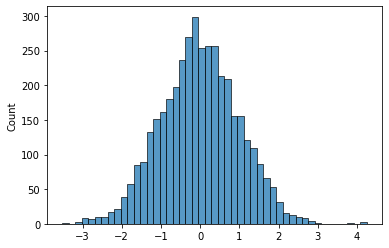

In [77]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
data = np.random.randn(4000)
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')
    
sns.histplot(data)

stat=0.794, p=9.051E-34
Probably not Gaussian


<Axes: ylabel='Count'>

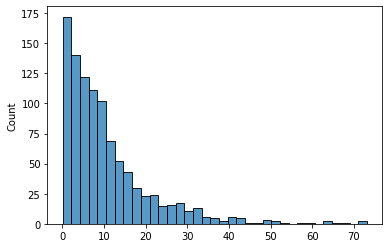

In [21]:
# Try it with a non Gaussian distribution - exponential distribution

data1 = np.random.exponential(10, 1000)
stat, p = shapiro(data1)
print('stat=%.3f, p=%.3E' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')
    
sns.histplot(data1)

#### D’Agostino’s K^2 Test

Tests whether a data sample has a Gaussian distribution.

Assumptions

   - Observations in each sample are independent and identically distributed (iid).

Interpretation

   - H0: the sample has a Gaussian distribution.
   - H1: the sample does not have a Gaussian distribution.


In [22]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = normaltest(data)
print('stat=%.3f, p=%.3E' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=3.392, p=1.834E-01
Probably Gaussian


/home/jordi/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [23]:
# Using the exponential distribution data

stat, p = normaltest(data1)
print('stat=%.3f, p=%.3E' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=466.684, p=4.581E-102
Probably not Gaussian


### Anderson-Darling Test

Tests whether a data sample has a Gaussian distribution.

Assumptions

   - Observations in each sample are independent and identically distributed (iid).

Interpretation

   - H0: the sample has a Gaussian distribution.
   - H1: the sample does not have a Gaussian distribution.


In [24]:
# Example of the Anderson-Darling Normality Test
from scipy.stats import anderson
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=0.424
Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


In [25]:
result = anderson(data1)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=52.751
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


## 2. Correlation Tests

Pearson’s Correlation Coefficient

Tests whether two samples have a linear relationship.

Assumptions

   - Observations in each sample are independent and identically distributed (iid).
   - Observations in each sample are normally distributed.
   - Observations in each sample have the same variance.

Interpretation

   - H0: the two samples are independent.
   - H1: there is a dependency between the samples.


stat=0.688, p=0.028
Probably dependent


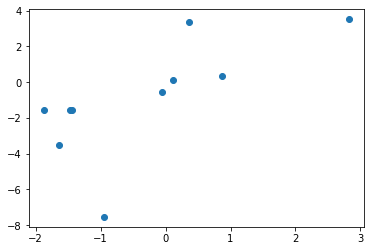

array([[1.        , 0.68796964],
       [0.68796964, 1.        ]])

In [38]:
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')
    
plt.scatter(data1,data2)
plt.show()

np.corrcoef(data1,data2)

### Spearman’s Rank Correlation

Tests whether two samples have a monotonic relationship.

Assumptions

   - Observations in each sample are independent and identically distributed (iid).
   - Observations in each sample can be ranked.

Interpretation

   - H0: the two samples are independent.
   - H1: there is a dependency between the samples.


stat=0.855, p=0.002
Probably dependent


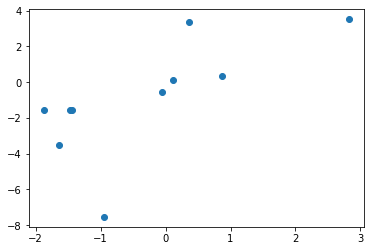

array([[1.        , 0.68796964],
       [0.68796964, 1.        ]])

In [39]:
# Example of the Spearman's Rank Correlation Test
from scipy.stats import spearmanr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')
    
plt.scatter(data1,data2)
plt.show()

np.corrcoef(data1,data2)

### Kendall’s Rank Correlation

Tests whether two samples have a monotonic relationship.

Assumptions

   - Observations in each sample are independent and identically distributed (iid).
   - Observations in each sample can be ranked.

Interpretation

   - H0: the two samples are independent.
   - H1: there is a dependency between the samples.


stat=0.733, p=0.002
Probably dependent


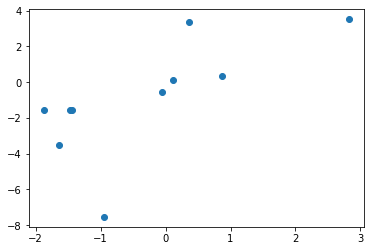

array([[1.        , 0.68796964],
       [0.68796964, 1.        ]])

In [42]:
from scipy.stats import kendalltau
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')
    
plt.scatter(data1,data2)
plt.show()

np.corrcoef(data1,data2)

### Chi-Squared Test

Tests whether two categorical variables are related or independent.

Assumptions

   - Observations used in the calculation of the contingency table are independent.
   - 25 or more examples in each cell of the contingency table.

Interpretation

   - H0: the two samples are independent.
   - H1: there is a dependency between the samples.


In [46]:
# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency
table = [[10, 20, 30],[6,  9,  17]]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.272, p=0.873
Probably independent


## 3. Stationary Tests

This section lists statistical tests that you can use to check if a time series is stationary or not.
Augmented Dickey-Fuller Unit Root Test

Tests whether a time series has a unit root, e.g. has a trend or more generally is autoregressive.

Assumptions

   - Observations in are temporally ordered.

Interpretation

   - H0: a unit root is present (series is non-stationary).
   - H1: a unit root is not present (series is stationary).


In [47]:
# Example of the Augmented Dickey-Fuller unit root test
from statsmodels.tsa.stattools import adfuller
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, obs, crit, t = adfuller(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably not Stationary')
else:
    print('Probably Stationary')

stat=0.175, p=0.971
Probably not Stationary


### Kwiatkowski-Phillips-Schmidt-Shin

Tests whether a time series is trend stationary or not.

Assumptions

   - Observations in are temporally ordered.

Interpretation

   - H0: the time series is trend-stationary.
   - H1: the time series is not trend-stationary.


In [51]:
# Example of the Kwiatkowski-Phillips-Schmidt-Shin test
from statsmodels.tsa.stattools import kpss
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, crit = kpss(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Stationary')
else:
    print('Probably not Stationary')

stat=0.594, p=0.023
Probably not Stationary


## 4. Parametric Statistical Hypothesis Tests

This section lists statistical tests that you can use to compare data samples.

### Student’s t-test

Tests whether the means of two independent samples are significantly different.

Assumptions

   - Observations in each sample are independent and identically distributed (iid).
   - Observations in each sample are normally distributed.
   - Observations in each sample have the same variance.

Interpretation

   - H0: the means of the samples are equal.
   - H1: the means of the samples are unequal.


In [59]:
# Example of the Student's t-test
from scipy.stats import ttest_ind
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')
    
print('variance of data1 is {}'.format(np.var(data1)))
print('variance of data2 is {}'.format(np.var(data2)))

stat=-0.326, p=0.748
Probably the same distribution
variance of data1 is 1.9101818899999998
variance of data2 is 0.62447689


### Paired Student’s t-test

Tests whether the means of two paired samples are significantly different.

Assumptions

   - Observations in each sample are independent and identically distributed (iid).
   - Observations in each sample are normally distributed.
   - Observations in each sample have the same variance.
   - Observations across each sample are paired.

Interpretation

   - H0: the means of the samples are equal.
   - H1: the means of the samples are unequal.


In [61]:
# Example of the Paired Student's t-test
from scipy.stats import ttest_rel
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')
    
print('variance of data1 is {}'.format(np.var(data1)))
print('variance of data2 is {}'.format(np.var(data2)))

stat=-0.334, p=0.746
Probably the same distribution
variance of data1 is 1.9101818899999998
variance of data2 is 0.62447689


### Analysis of Variance Test (ANOVA)

Tests whether the means of two or more independent samples are significantly different.

Assumptions

   - Observations in each sample are independent and identically distributed (iid).
   - Observations in each sample are normally distributed.
   - Observations in each sample have the same variance.

Interpretation

   - H0: the means of the samples are equal.
   - H1: one or more of the means of the samples are unequal.


In [67]:
from scipy.stats import f_oneway
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')
    
print('variance of data1 is {}'.format(np.var(data1)))
print('variance of data2 is {}'.format(np.var(data2)))
print('variance of data3 is {}'.format(np.var(data3)))


stat=0.096, p=0.908
Probably the same distribution
variance of data1 is 1.9101818899999998
variance of data2 is 0.62447689
variance of data3 is 0.4910678399999999


## 5. Nonparametric Statistical Hypothesis Tests

### Mann-Whitney U Test

Tests whether the distributions of two independent samples are equal or not.

Assumptions

   - Observations in each sample are independent and identically distributed (iid).
   - Observations in each sample can be ranked.

Interpretation

   - H0: the distributions of both samples are equal.
   - H1: the distributions of both samples are not equal.


In [68]:
from scipy.stats import mannwhitneyu
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=40.000, p=0.473
Probably the same distribution


### Wilcoxon Signed-Rank Test

Tests whether the distributions of two paired samples are equal or not.

Assumptions

   - Observations in each sample are independent and identically distributed (iid).
   - Observations in each sample can be ranked.
   - Observations across each sample are paired.

Interpretation

   - H0: the distributions of both samples are equal.
   - H1: the distributions of both samples are not equal.


In [69]:
from scipy.stats import wilcoxon
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = wilcoxon(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=21.000, p=0.557
Probably the same distribution


### Kruskal-Wallis H Test

Tests whether the distributions of two or more independent samples are equal or not.

Assumptions

   - Observations in each sample are independent and identically distributed (iid).
   - Observations in each sample can be ranked.

Interpretation

   - H0: the distributions of all samples are equal.
   - H1: the distributions of one or more samples are not equal.


In [70]:
from scipy.stats import kruskal
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = kruskal(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=0.571, p=0.450
Probably the same distribution


### Friedman Test

Tests whether the distributions of two or more paired samples are equal or not.

Assumptions

   - Observations in each sample are independent and identically distributed (iid).
   - Observations in each sample can be ranked.
   - Observations across each sample are paired.

Interpretation

   - H0: the distributions of all samples are equal.
   - H1: the distributions of one or more samples are not equal.


In [71]:
# Example of the Friedman Test
from scipy.stats import friedmanchisquare
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = friedmanchisquare(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=0.800, p=0.670
Probably the same distribution
